# CS178 Final Project
For our final project, we will be using the Fashion MNIST dataset.

# Project Setup

Here, we will import the necessary libraries needed, with Tensorflow being the main library used for neural network construction. We then load the dataset, split it into training and testing segments, and plot the initial images.

fatal: destination path 'fashion-mnist' already exists and is not an empty directory.


Training Set Summary:
Number of training samples: 60000
Number of test samples: 10000
Sample image shape: (28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


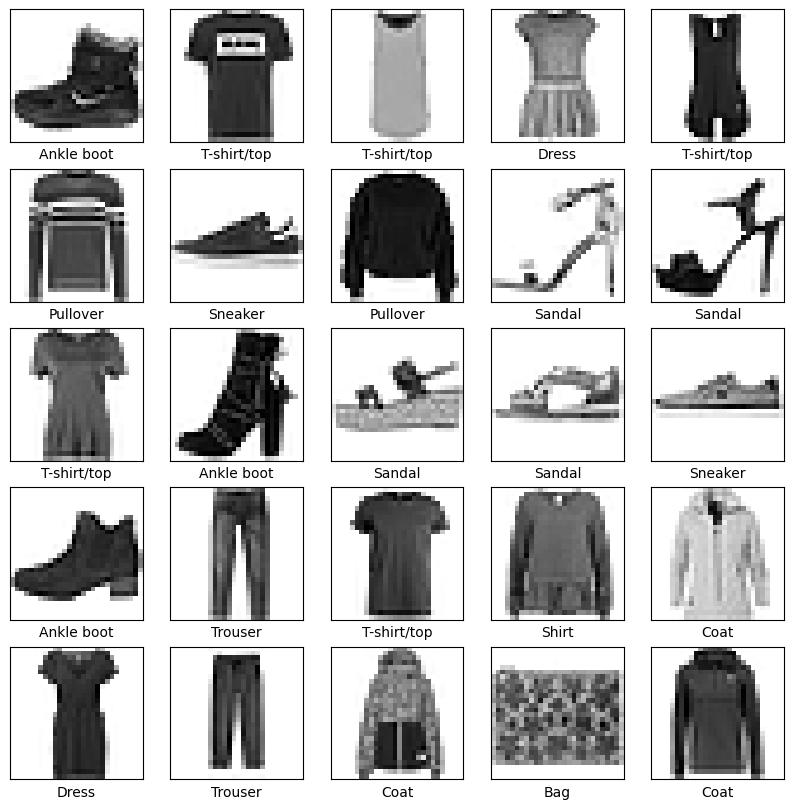

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

!git clone https://github.com/zalandoresearch/fashion-mnist.git

# Split into training and testing sets
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Data description
print("Training Set Summary:")
print(f"Number of training samples: {len(train_labels)}")
print(f"Number of test samples: {len(test_labels)}")
print("Sample image shape:", train_images[0].shape)
print("Unique labels:", np.unique(train_labels))

# Display the first few images with their labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


## Build the Model

Here, we construct the actual model. We use TensorFlow Keras API in order to efficiently perform this task, defining a simple neural network with one hidden layer. We then compile the actual model.

In [3]:
# Building the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Flattens images from 2D into 1D
    layers.Dense(128, activation='relu'), # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


## Train the Model

In [4]:
# Training the model
history = model.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels))


Epoch 1/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4927 - accuracy: 0.8275 - val_loss: 0.4436 - val_accuracy: 0.8436
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3744 - accuracy: 0.8642 - val_loss: 0.4011 - val_accuracy: 0.8557
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3360 - accuracy: 0.8776 - val_loss: 0.3917 - val_accuracy: 0.8605
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3107 - accuracy: 0.8858 - val_loss: 0.3642 - val_accuracy: 0.8698
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2937 - accuracy: 0.8913 - val_loss: 0.3521 - val_accuracy: 0.8747
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2787 - accuracy: 0.8961 - val_loss: 0.3564 - val_accuracy: 0.8743
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9015 - val_loss: 0.3567 - val_accuracy:

## Evaluate the Model

In [5]:
# Evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.4072 - accuracy: 0.8900 - 379ms/epoch - 1ms/step

Test accuracy: 0.8899999856948853


## Make Predictions

313/313 [==============================] - 0s 1ms/step


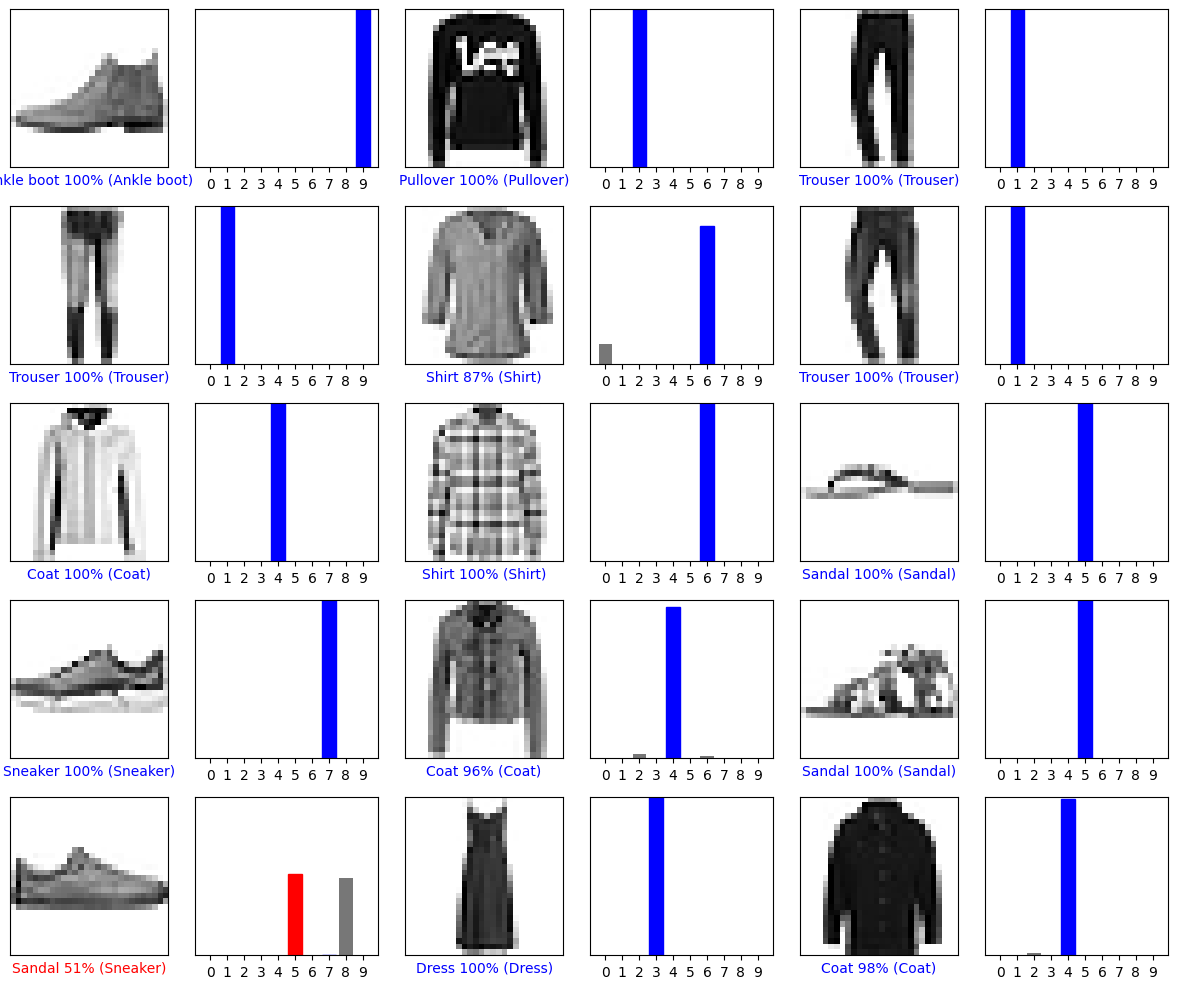

In [7]:
# Making predictions
probability_model = models.Sequential([model, 
                                       layers.Softmax()])
nn_predictions = probability_model.predict(test_images)

# Function to plot the image, its true label, and the predicted label
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Function to plot the value array of predictions
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plotting the first X test images, their predicted labels, and the true labels
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, nn_predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, nn_predictions[i], test_labels)
plt.tight_layout()
plt.show()



# kNN Classifier

In [8]:
# first we have to reshape the data to fit the kNN model
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))

# create and train the kNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_images_flat, train_labels)

# predict/evaluate kNN
knn_predictions = knn.predict(test_images_flat)
knn_accuracy = accuracy_score(test_labels, knn_predictions)

print('kNN Test Accuracy: ', knn_accuracy)

kNN Test Accuracy:  0.8554


# Logistic Regression Classifier

In [9]:
# creates a logistic classifier and fits it to the flattened training set
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(train_images_flat, train_labels)

# predicts and evaluates accuracy of the model
logistic_predictions = logistic_model.predict(test_images_flat)
logistic_accuracy = accuracy_score(test_labels, logistic_predictions)
print('Logistic Regression Test accuracy:', logistic_accuracy)

Logistic Regression Test accuracy: 0.8428


# Model Comparisons

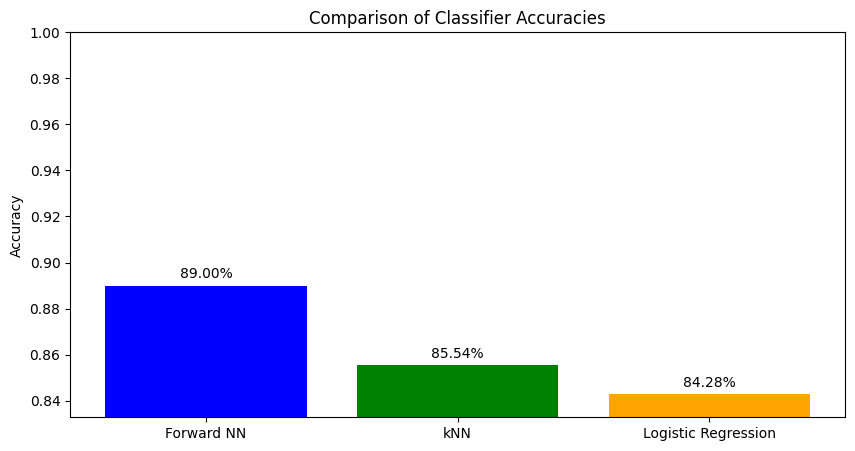

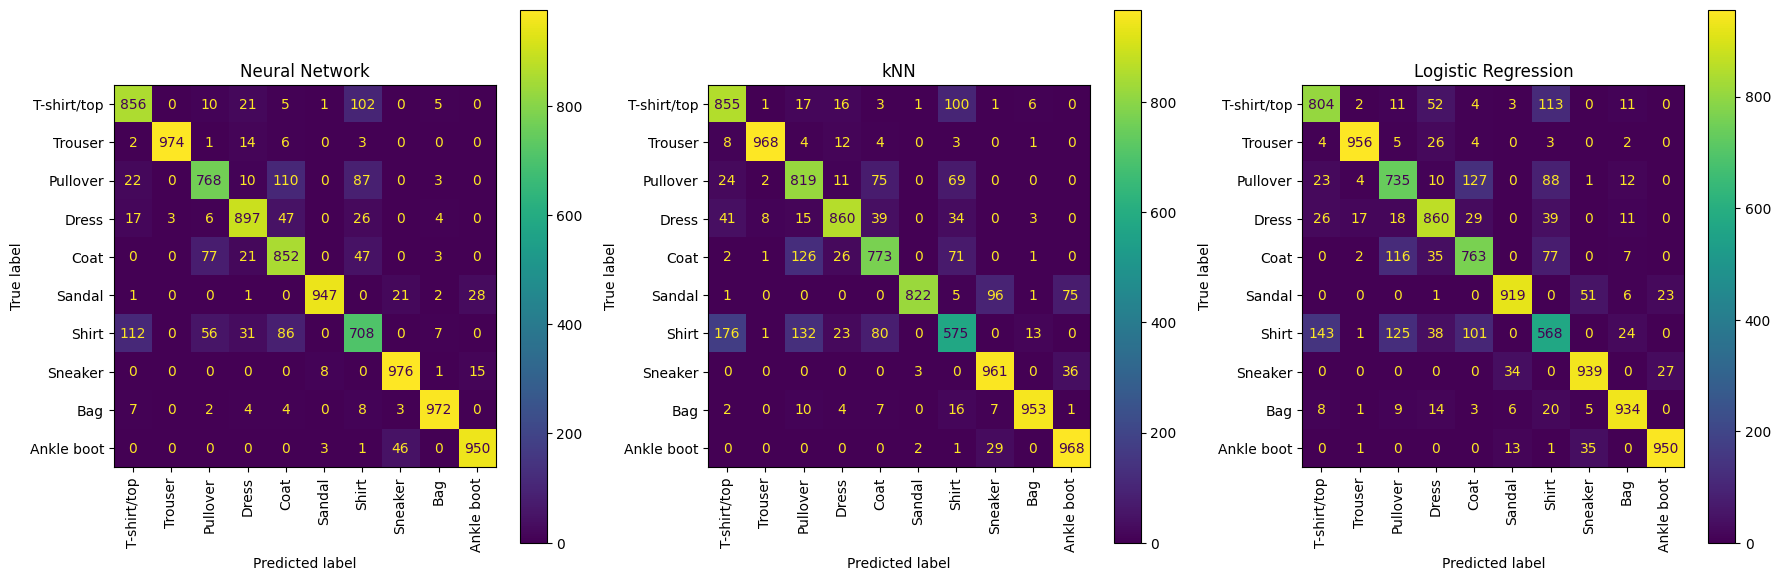

In [10]:
# plots comparison of classifiers

# Plot comparison of classifiers with adjusted y-axis scale
models = ['Forward NN', 'kNN', 'Logistic Regression']
accuracies = [test_acc, knn_accuracy, logistic_accuracy]

plt.figure(figsize=(10, 5))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.ylim([min(accuracies) - 0.01, 1])  # Adjusting y-axis scale for better visual comparison

# Annotate each bar with the accuracy value
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2%}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

# Plot Confusion Matrices for each classifier
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
cm_nn = confusion_matrix(test_labels, np.argmax(nn_predictions, axis=1))
cm_knn = confusion_matrix(test_labels, knn_predictions)
cm_logistic = confusion_matrix(test_labels, logistic_predictions)

ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=class_names).plot(ax=axes[0], xticks_rotation='vertical')
axes[0].set_title('Neural Network')

ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=class_names).plot(ax=axes[1], xticks_rotation='vertical')
axes[1].set_title('kNN')

ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=class_names).plot(ax=axes[2], xticks_rotation='vertical')
axes[2].set_title('Logistic Regression')

plt.tight_layout()
plt.show()